In [1]:
from matplotlib.pyplot import *
import numpy as np
import pandas as pd
import os
import importlib


from ATARI.sammy_interface import sammy_interface, sammy_classes, sammy_functions, template_creator

from ATARI.ModelData.particle_pair import Particle_Pair

from ATARI.ModelData.experimental_model import Experimental_Model

from copy import copy


In [2]:
%matplotlib widget

## Measurement Data

The following measurement data are imported from the work of Jesse Brown at RPI (currently at ORNL).
These measurements are detailed in https://www.tandfonline.com/doi/full/10.1080/00295639.2023.2249786 and consist of 6 experimental configurations.
Of the 4 transmission measurements only 3 are used for evaluation and the 4th (45m FP) is used for validation. 
Both 2 capture measurements are used in evaluation.

The transmission data are reliable in the range 0.15-100 keV.
The capture data are reliable from 0.15-200 keV. 



In [3]:
### Determine channel widths
from ATARI.theory.experimental import e_to_t, t_to_e

def get_chw_and_upperE(E, FP):
    E = np.array(E)
    tof = e_to_t(E, FP, True)
    dt = np.diff(tof*1e6)
    widths1, index1 = np.unique(np.round(dt, 4), return_index=True)
    chw, Emax = np.flipud(widths1), np.flipud(E[index1])
    strc = ''
    stre = ''
    for c,e in zip(chw, Emax):
        strc += f"{c*1e3:.2f}, "
        stre += f"{e:.2f}, "
    return stre, strc

# Emax, chw = get_chw_and_upperE(transdat6.E, 100.14)
# Emax, chw = get_chw_and_upperE(capdat1.E, 45.27)
# print(Emax)
# print(chw)

In [4]:
### 1mm capture data
capdat1 = sammy_functions.readlst("./yield_ta1b_unsmooth.dat")
expcap1 = Experimental_Model(title = "cap1mm",
                                reaction ="capture", 
                                energy_range = [150, 6000],
                                n = (0.005631, 0),
                                FP = (45.27, 0.05),
                                burst= (8.0,1.0), 
                                temp= (294.2610, 0.0),
                                channel_widths={
                                    "maxE": [68.20,  122.68, 330.48, 547.57, 199359.52], 
                                    "chw":  [821.40, 410.70, 102.70, 51.30,  25.70],
                                    "dchw": [0.8,    0.8,    0.8,    0.8,    0.8]
                                }
                               )
capdat1 = capdat1[(capdat1.E<max(expcap1.energy_range)) & (capdat1.E>min(expcap1.energy_range))]


### 2mm capture data
capdat2 = sammy_functions.readlst("./yield_ta2_unsmooth.dat")
expcap2 = Experimental_Model(   title = "cap2mm",
                                reaction = "capture", 
                                energy_range = [150, 6000],
                                n = (0.011179, 0.0),
                                FP = (45.27, 0.05),
                                burst = (8.0,1.0),
                                temp = (294.2610, 0.0),
                                channel_widths={
                                    "maxE": [68.20,  122.68, 330.48, 547.57, 199359.52], 
                                    "chw":  [821.40, 410.70, 102.70, 51.30,  25.70],
                                    "dchw": [0.8,    0.8,    0.8,    0.8,    0.8]
                                }
                               )
capdat2 = capdat2[(capdat2.E<max(expcap2.energy_range)) & (capdat2.E>min(expcap2.energy_range))]


### 1mm Transmission data
transdat1 = sammy_functions.readlst("./trans-Ta-1mm.twenty")
transdat1_covfile = './trans-Ta-1mm.idc'
chw, Emax = get_chw_and_upperE(transdat1.E, 100.14)
exptrans1 = Experimental_Model(title = "trans1mm",
                               reaction = "transmission", 
                               energy_range = [150, 6000],

                                n = (0.00566,0.0),  
                                FP = (100.14,0.0), 
                                burst = (8, 0.0), 
                                temp = (294.2610, 0.0),

                               channel_widths={
                                    "maxE": [216.16, 613.02, 6140.23], 
                                    "chw": [204.7, 102.4, 51.2],
                                    "dchw": [1.6, 1.6, 1.6]
                                }
                                
                               )
transdat1 = transdat1[(transdat1.E<max(exptrans1.energy_range)) & (transdat1.E>min(exptrans1.energy_range))]

### 3mm transmission data
transdat3 = sammy_functions.readlst("./trans-Ta-3mm.twenty")
transdat3_covfile = "./trans-Ta-3mm.idc"
exptrans3 = Experimental_Model(title = "trans3mm",
                               reaction = "transmission", 
                               energy_range = [150, 6000],

                                n = (0.017131,0.0),  
                                FP = (100.14,0.0), 
                                burst = (8, 0.0), 
                                temp = (294.2610, 0.0),

                               channel_widths={
                                    "maxE": [216.16, 613.02, 6140.23], 
                                    "chw": [204.7, 102.4, 51.2],
                                    "dchw": [1.6, 1.6, 1.6]
                                }
                                
                               )
transdat3 = transdat3[(transdat3.E<max(exptrans3.energy_range)) & (transdat3.E>min(exptrans3.energy_range))]


### 6mm transmission data
transdat6 = sammy_functions.readlst("./trans-Ta-6mm.twenty")
transdat6_covfile = "./trans-Ta-6mm.idc"
exptrans6 = Experimental_Model(title = "trans6mm",
                               reaction = "transmission", 
                               energy_range = [150, 6000],

                                n = (0.03356,0.0),  
                                FP = (100.14,0.0), 
                                burst = (8, 0.0), 
                                temp = (294.2610, 0.0),

                               channel_widths={
                                    "maxE": [216.16, 613.02, 6140.23], 
                                    "chw": [204.7, 102.4, 51.2],
                                    "dchw": [1.6, 1.6, 1.6]
                                }
                                
                               )
transdat6 = transdat6[(transdat6.E<max(exptrans6.energy_range)) & (transdat6.E>min(exptrans6.energy_range))]


### Not using 12mm measurement for evaluation - this is a validation measurement

# transdat12 = sammy_functions.readlst("/Users/noahwalton/research_local/resonance_fitting/ATARI_workspace/measurement_data/trans-Ta-12mm.dat")
# # transdat12_covfile = Need to generate from sys and stat covariances
# exptrans12 = Experimental_Model(title = "trans12",
#                                 reaction = "transmission",
#                                 energy_range = erange_all,

#                                 sammy_inputs = {
#                                     'alphanumeric'       :   ["BROADENING IS WANTED"],
#                                     'ResFunc'            :   "ORRES"
#                                         },

#                                 n = (0.067166, 0.0),  
#                                 FP = (35.185,0.0), 
#                                 burst = (8,0.0), 
#                                 temp = (294.2610, 0.0),

#                                 channel_widths={
#                                         "maxE": [270], 
#                                         "chw": [102.7],
#                                         "dchw": [0.8]
#                                         },

#                                 additional_resfunc_lines=["WATER 0004 5.6822000 -0.54425 0.07733000", "WATER      0.5000000  0.05000 0.00700000", "LITHI 000  -1.000000  -1.0000 6.00000000", "LITHI      0.1000000  0.10000 0.60000000", "LITHI      166.87839 -28.7093 1.260690", "LITHI      0.2574580 -0.06871 0.004915"]
#                                )

# transdat12 = transdat12[(transdat12.E<max(exptrans12.energy_range)) & (transdat12.E>min(exptrans12.energy_range))]


In [5]:
### plotting function
def plot(datasets, experiments, fits=[], priors=[], true=[]):
    colors = ["C1", "C2", "C3", "C4", "C5", "C6", "C7"]
    fig, axes = subplots(2,1, figsize=(8,6), sharex=True)

    for i, exp in enumerate(experiments):
        if exp.reaction == "transmission":
            model_key = "theo_trans"
            iax = 0
        elif exp.reaction == "capture":
            model_key = "theo_xs"
            iax = 1
        else:
            raise ValueError()

        axes[iax].errorbar(datasets[i].E, datasets[i].exp, yerr=datasets[i].exp_unc, zorder=0,
                                                fmt='.', color=colors[i], linewidth=0.5, markersize=1.5, capsize=1, label=exp.title)
        
        if len(fits) != 0:
            axes[iax].plot(fits[i].E, fits[i][model_key], color=colors[i], lw=1.5, label=f'fit {exp.title}')

        if len(priors) != 0:
            axes[iax].plot(priors[i].E, priors[i][model_key], '--', color=colors[i], lw=1.5) #, label=f'prior {exp.title}')
        if len(true) != 0:
            axes[iax].plot(true[i].E, true[i][model_key], '-', color=colors[i], alpha=0.5, lw=1.5) #, label=f'prior {exp.title}')

        
    axes[0].set_ylabel("T")
    axes[1].set_ylabel(r"$Y_{\gamma}$")

    ### make it pretty
    for ax in axes:

        ax.set_xscale('log')
        ax.set_ylim([-0.1,1.1])
        ax.legend()

    fig.supxlabel('Energy (eV)')
    fig.tight_layout()

    return fig

In [6]:
### setup in zipped lists 
datasets = [capdat1, capdat2, transdat1, transdat3, transdat6]
experiments= [expcap1, expcap2, exptrans1, exptrans3, exptrans6]
covariance_data = [{}, {}, transdat1_covfile, transdat3_covfile, transdat6_covfile]
templates = []
for data, exp in zip(datasets, experiments):
    filepath = f'template_{exp.title}_edited'
    exp.template = os.path.realpath(filepath)


fig = plot(datasets, experiments)
fig.tight_layout()

Error in callback <function flush_figures at 0x7fd4a14443a0> (for post_execute):


In [ ]:
## Could also plot covariance here

## Fit from ENDF or JEFF

In [ ]:
sammyRTO = sammy_classes.SammyRunTimeOptions('/Users/noahwalton/gitlab/sammy/sammy/build/bin/sammy',
                             {"Print"   :   True,
                              "bayes"   :   False,
                              "keep_runDIR"     : True
                              })

matnum = 7328

# endf_file = "/Users/noahwalton/research_local/data/neutrons_ENDF-B-VII.1/n-073_Ta_181.endf"
# endf_parameters = sammy_functions.get_endf_parameters(endf_file, matnum, sammyRTO)

# endf_parameters = endf_parameters[(endf_parameters.E<260) & (endf_parameters.E>190)]
# endf_parameters["varyGn1"] = np.ones(len(endf_parameters))
# endf_parameters["varyGg"] = np.ones(len(endf_parameters))*0
# endf_parameters["varyE"] = np.ones(len(endf_parameters))

jeff_file = "/Users/noahwalton/research_local/data/JEFF33_endf6/73-Ta-181g.jeff33"
jeff_parameters = sammy_functions.get_endf_parameters(jeff_file, matnum, sammyRTO)

jeff_parameters = jeff_parameters[(jeff_parameters.E<230) & (jeff_parameters.E>190)]
jeff_parameters["varyGn1"] = np.ones(len(jeff_parameters))
jeff_parameters["varyGg"] = np.ones(len(jeff_parameters))*1
jeff_parameters["varyE"] = np.ones(len(jeff_parameters))


In [ ]:

Ta_pair = Particle_Pair(isotope="Ta181",
                        formalism="XCT",
                        ac=8.1271,     # scattering radius
                        M=180.948030,  # amu of target nucleus
                        m=1,           # amu of incident neutron
                        I=3.5,         # intrinsic spin, positive parity
                        i=0.5,         # intrinsic spin, positive parity
                        l_max=2)       # highest order l-wave to consider

# Ta_pair.add_spin_group(Jpi='3.0',
#                        J_ID=1,
#                        D_avg=8.79,
#                        Gn_avg=46.5,
#                        Gn_dof=1,
#                        Gg_avg=64.0,
#                        Gg_dof=1000)

# Ta_pair.add_spin_group(Jpi='4.0',
#                        J_ID=2,
#                        D_avg=4.99,
#                        Gn_avg=35.5,
#                        Gn_dof=1,
#                        Gg_avg=64.0,
#                        Gg_dof=1000)


rto = sammy_classes.SammyRunTimeOptions('/Users/noahwalton/gitlab/sammy/sammy/build/bin/sammy',
                             {"Print"   :   True,
                              "bayes"   :   True,
                              "keep_runDIR"     : True,
                              "sammy_runDIR": "sammy_runDIR_1"
                              })


sammyINPyw = sammy_classes.SammyInputDataYW(
    particle_pair = Ta_pair,
    resonance_ladder = jeff_parameters,  

    datasets= datasets,
    experiments = experiments,
    experimental_covariance= covariance_data, 
    
    max_steps = 10,
    iterations = 2,
    step_threshold = 0.1,
    autoelim_threshold = None,

    LS = False,
    LevMar = True,
    LevMarV = 2,
    LevMarVd= 5,
    initial_parameter_uncertainty = 0.01
    )



In [ ]:
sammyOUT = sammy_functions.run_sammy_YW(sammyINPyw, rto)

KeyboardInterrupt: 

In [ ]:
# prior_lsts = lsts
print(sammyOUT.chi2n, np.sum(sammyOUT.chi2n))
print(sammyOUT.chi2n_post, np.sum(sammyOUT.chi2n_post))

print(sammyOUT.chi2, np.sum(sammyOUT.chi2))
print(sammyOUT.chi2_post, np.sum(sammyOUT.chi2_post))

[2.52404, 2.35865, 1.43435, 8.36886] 14.6859
[3.88976, 3.26053, 2.04217, 1.54124] 10.7337
[325.602, 304.266, 273.961, 3364.28] 4268.109
[501.779, 420.608, 390.055, 619.578] 1932.02


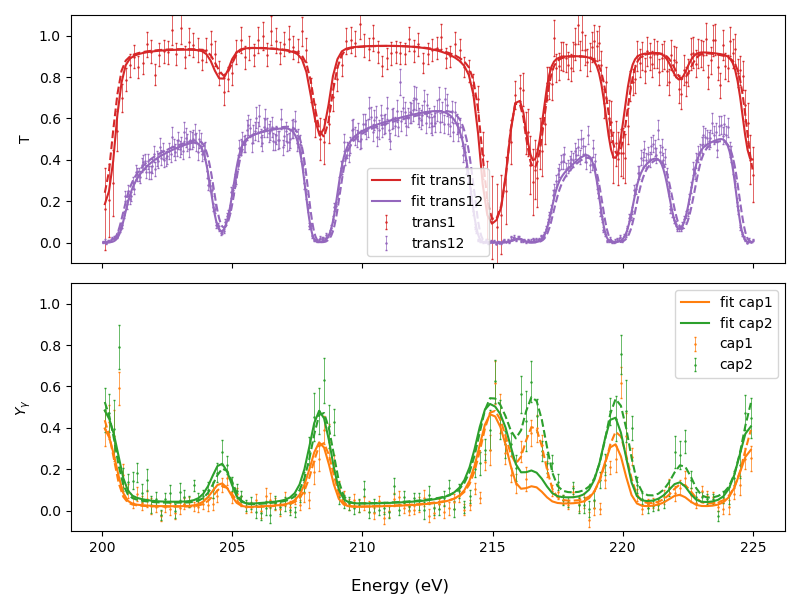

In [ ]:
fig = plot(datasets, experiments, sammyOUT.pw_post, priors=sammyOUT.pw)
fig.tight_layout()

### Now, generate synthetic datasets modelled after each dataset you have

In [ ]:
# from ATARI.theory.resonance_statistics import make_res_par_avg

# ac = 0.81271    # scattering radius in 1e-12 cm 
# M = 180.948030  # amu of target nucleus
# m = 1           # amu of incident neutron
# I = 3.5         # intrinsic spin, positive parity
# i = 0.5         # intrinsic spin, positive parity
# l_max = 1       # highest order l-wave to consider


# spin_groups = [ (3.0,1,0)]  # ,  (4.0,1,0)]
# res_par_avg_1 = make_res_par_avg(J_ID=1,
#                                  D_avg = 8.79, 
#                             Gn_avg= 46.4, #0.658, 
#                             n_dof = 1, 
#                             Gg_avg = 64.0, 
#                             g_dof = 1000, 
#                             print = False)

# res_par_avg_2 = make_res_par_avg(J_ID=2,
#                                  D_avg = 4.99, 
#                             Gn_avg= 35.5, #0.658, 
#                             n_dof = 1, 
#                             Gg_avg = 64.0, 
#                             g_dof = 1000, 
#                             print = False)

# average_parameters = {'3.0':res_par_avg_1}
# Ta_pair = Particle_Pair( ac, M, m, I, i, l_max,
#                                 input_options={},
#                                 spin_groups=spin_groups,
#                                 average_parameters=average_parameters )   


In [ ]:
# from ATARI.syndat.transmission_rpi import syndat_T
# from ATARI.syndat.yield_rpi import syndat_Y

# ### In the future this code block will be inside of syndat 
# # Also, currently this is not sampling resonance parameters


# synthetic_data_dfs = []
# for i, exp in enumerate(experiments):

#     true_df = copy(sammyOUT.pw_post[i])
#     if exp.reaction == "transmission":
#         true = "theo_trans"
#         syndat = syndat_T()
#     elif exp.reaction == "capture":
#         true = "theo_xs"
#         syndat = syndat_Y()
#     else:
#         raise ValueError()

#     true_df = true_df[["E",true]]
#     true_df.rename(columns={true:"true"}, inplace=True)

#     syndat.run(true_df)
#     synthetic_data_dfs.append(syndat.data)

    

In [ ]:

# fig, axes = subplots(2,1, figsize=(8,6), sharex=True)


# for i, exp in enumerate(experiments):
    
#     if exp.reaction == "transmission":

#         axes[0].errorbar(synthetic_data_dfs[i].E, synthetic_data_dfs[i].exp, yerr=synthetic_data_dfs[i].exp_unc, zorder=0,
#                                                 fmt='.', color='darkgreen', linewidth=0.5, markersize=1.5, capsize=1, label='12mm')

#         axes[0].plot(synthetic_data_dfs[i].E, synthetic_data_dfs[i].true)
        
#     elif exp.reaction == "capture":
    
#         axes[1].errorbar(synthetic_data_dfs[i].E, synthetic_data_dfs[i].exp, yerr=synthetic_data_dfs[i].exp_unc, zorder=0, 
#                                                 fmt='.', color='indigo', linewidth=0.5, markersize=1.5, capsize=1, label='1mm')
#         axes[1].plot(synthetic_data_dfs[i].E, synthetic_data_dfs[i].true)


# axes[0].set_ylabel("T")
# axes[1].set_ylabel(r"$Y_{\gamma}$")

# ### make it pretty
# for ax in axes:
#     ax.set_xlim([200,250])
#     ax.set_ylim([-0.1,1.1])
#     ax.legend()

# fig.supxlabel('Energy (eV)')
# fig.tight_layout()

### Now fit synthetic or real data with automated evaluator

In [ ]:
### Reaction Model
Ta_pair = Particle_Pair(isotope = "Ta181",
                        resonance_ladder = pd.DataFrame(),
                        formalism = "XCT",
                        energy_range = [200,250],
                        ac = 8.127,
                        M = 180.94803,
                        I = 3,
                        l_max = 2
)

Ta_pair.add_spin_group(Jpi='3.0',
                       J_ID=1,
                       D_avg=8.79,
                       Gn_avg=46.5,
                       Gn_dof=1,
                       Gg_avg=64.0,
                       Gg_dof=1000)

Ta_pair.add_spin_group(Jpi='4.0',
                       J_ID=2,
                       D_avg=4.99,
                       Gn_avg=35.5,
                       Gn_dof=1,
                       Gg_avg=64.0,
                       Gg_dof=1000)


In [ ]:
from ATARI.AutoFit.initial_FB_solve import InitialFB, InitialFBOPT

sammy_rto_fit = sammy_classes.SammyRunTimeOptions('/Users/noahwalton/gitlab/sammy/sammy/build/bin/sammy',
                                        {"Print":   True,
                                         "bayes":   True,
                                         "keep_runDIR": True,
                                         "sammy_runDIR": "sammy_runDIR"
                                         })


options = InitialFBOPT(Gn_threshold=1e-1,
                       iterations=1
                       )
autofit_initial = InitialFB(options)

In [ ]:
outs = autofit_initial.fit(Ta_pair,
                               [200,250],
                               datasets,
                               experiments,
                               covariance_data,
                               sammy_rto_fit)


	FIT 1
Initial solve from 124 resonance features

Stepping until convergence
chi2 values
step fudge: ['cap1', 'cap2', 'trans1', 'trans12', 'sum']
0    0.5  : [8.147, 9.7652, 0.2673, 2385.02, 2403.1994]
1    0.75 : [3.4838, 3.381, 1.2072, 14.8411, 22.9131]
2    1.125: [4.2125, 3.797, 3.2228, 5.3728, 16.6051]
Repeat step 3, 	fudge: ['cap1', 'cap2', 'trans1', 'trans12', 'sum']
		0.75 : [4.5579, 3.9814, 4.8159, 5.7424, 19.0976]
		0.5  : [3.2762, 3.4335, 2.236, 10.2836, 19.2293]
		0.333: [3.4381, 3.3385, 2.2891, 5.1005, 14.1661]
3    0.333: [3.4381, 3.3385, 2.2891, 5.1005, 14.1661]
Repeat step 4, 	fudge: ['cap1', 'cap2', 'trans1', 'trans12', 'sum']
		0.222: [3.5668, 3.421, 2.3382, 4.874, 14.2]
		0.148: [3.5627, 3.4204, 2.3132, 4.9003, 14.1965]
		0.099: [3.5539, 3.416, 2.2916, 4.9256, 14.187]
		0.066: [3.5395, 3.4071, 2.2785, 4.9505, 14.1756]
		0.044: [3.5188, 3.3935, 2.2744, 4.9779, 14.1645]
4    0.044: [3.5188, 3.3935, 2.2744, 4.9779, 14.1645]
Chi2 improvement below threshold

------------

In [ ]:
sammyOUT_fit = outs[-1]
print(sammyOUT_fit.chi2n_post)
print(len(sammyOUT_fit.par_post))
print("12:30 for 1 iter")

[1.88734, 2.06594, 0.820785, 1.11825]
29
12:30 for 1 iter


In [ ]:
sammyOUT_fit = outs[-1]
print(sammyOUT_fit.chi2n_post)
print(len(sammyOUT_fit.par_post))
print("15:13 for 2 iter")

[1.83855, 2.06303, 0.801816, 1.16254]
23
15:13 for 1 iter


In [ ]:
sammyOUT_fit = outs[-1]
print(sammyOUT_fit.chi2n_post)
print(len(sammyOUT_fit.par_post))
print("6:30 for 0 iter")

[1.9649, 2.07051, 0.801756, 1.18107]
26
6:30 for 0 iter


In [ ]:
100/(100*100)

0.01

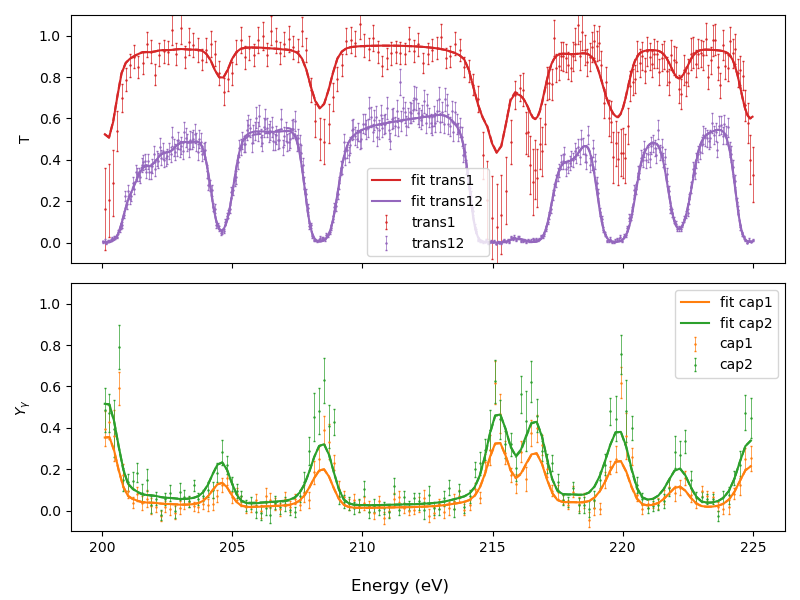

In [ ]:
fig = plot(datasets, experiments, sammyOUT_fit.pw_post, priors=sammyOUT_fit.pw)
fig.tight_layout()

In [ ]:
test = sammyOUT_fit.par_post

In [ ]:
thresh = 1e0
print(np.count_nonzero(sammyOUT_fit.par_post.Gn1>thresh))
par2 =copy(sammyOUT_fit.par_post)
par2 = par2[par2.Gn1>thresh]
par2["varyE"] = np.ones(len(par2))
par2["varyGg"] = np.ones(len(par2))
par2

15


,E,Gg,Gn1,varyE,varyGg,varyGn1,J_ID
0,200.180736,59.181244,1.643242,1.0,1.0,1.0,1.0
3,204.573959,104.666478,3.378534,1.0,1.0,1.0,1.0
5,208.497611,132.288701,5.666598,1.0,1.0,1.0,1.0
6,214.546246,0.000010,5.216816,1.0,1.0,1.0,1.0
7,215.196708,47.781788,14.444129,1.0,1.0,1.0,1.0
8,215.982256,0.945066,2.688213,1.0,1.0,1.0,1.0
9,216.688284,154.264896,5.207349,1.0,1.0,1.0,1.0
11,219.394755,0.035261,3.256378,1.0,1.0,1.0,1.0
12,222.091372,11.488702,2.216257,1.0,1.0,1.0,1.0
14,225.076405,29.297698,3.631933,1.0,1.0,1.0,1.0


In [ ]:
sammyINPyw.resonance_ladder = par2
sammyOUT_fit2 = sammy_functions.run_sammy_YW(sammyINPyw, rto)

Stepping until convergence
chi2 values
step fudge: ['cap1', 'cap2', 'trans1', 'trans12', 'sum']
0    1.0  : [2.0371, 2.2226, 0.8759, 4.2391, 9.3747]
1    2.0  : [2.044, 2.1297, 0.8315, 1.8082, 6.8133]


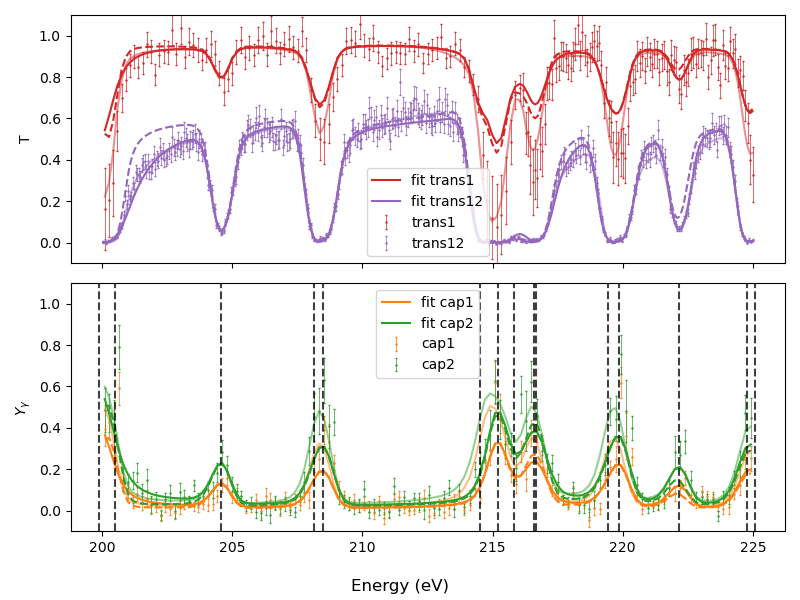

In [ ]:
fig = plot(datasets, experiments, sammyOUT_fit2.pw_post, priors=sammyOUT_fit2.pw, true=sammyOUT.pw_post)
ax = fig.gca()
for i,r in sammyOUT_fit2.par_post.iterrows():
    ax.axvline(r.E, ymin=0, ymax=1, linestyle='--', alpha=0.75, color='k')
fig.tight_layout()

In [ ]:
sammyOUT_fit2.par_post

,E,Gg,Gn1,varyE,varyGg,varyGn1,J_ID
0,200.482246,66.516682,0.061851,1.0,1.0,1.0,1.0
1,204.575611,113.150170,3.224962,1.0,1.0,1.0,1.0
2,208.501238,142.029118,5.413817,1.0,1.0,1.0,1.0
3,214.532442,0.000010,4.826472,1.0,1.0,1.0,1.0
4,215.196261,65.133434,12.527182,1.0,1.0,1.0,1.0
5,215.818231,0.966611,1.540333,1.0,1.0,1.0,1.0
6,216.660522,435.089548,8.007817,1.0,1.0,1.0,1.0
7,219.419226,0.032165,3.487444,1.0,1.0,1.0,1.0
8,222.163243,32.617337,3.385463,1.0,1.0,1.0,1.0
9,225.066371,26.117727,4.478372,1.0,1.0,1.0,1.0


In [ ]:
jeff_parameters

,E,Gg,Gn1,varyE,varyGg,varyGn1,J_ID
46,194.80,55.0000,99.5555,1.0,1.0,1.0,2.0
47,200.00,63.0000,31.4285,1.0,1.0,1.0,1.0
48,204.67,64.9999,2.7540,1.0,1.0,1.0,1.0
49,208.48,64.9999,9.4220,1.0,1.0,1.0,2.0
50,215.09,64.9999,48.2700,1.0,1.0,1.0,2.0
51,216.60,64.9999,19.3900,1.0,1.0,1.0,1.0
52,219.81,64.9999,12.8800,1.0,1.0,1.0,2.0
53,222.29,64.9999,2.4360,1.0,1.0,1.0,2.0
54,225.15,64.9999,20.5700,1.0,1.0,1.0,2.0


In [ ]:

par3 =copy(sammyOUT_fit2.par_post)
par3 = par3.iloc[[0,1,2,5,7,9,11,12,15], :]
par3.iloc[[0,3,4,6,7,8], 6] = 2.0
par3

IndexError: positional indexers are out-of-bounds

In [ ]:

sammyINPyw.resonance_ladder = par3
sammyOUT_fit3 = sammy_functions.run_sammy_YW(sammyINPyw, rto)

Stepping until convergence
chi2 values
step fudge: ['cap1', 'cap2', 'trans1', 'trans12', 'sum']
0    1.0  : [4.9334, 5.2588, 2.4834, 371.408, 384.0836]
1    2.0  : [5.4807, 6.5918, 3.9721, 29.5762, 45.6208]


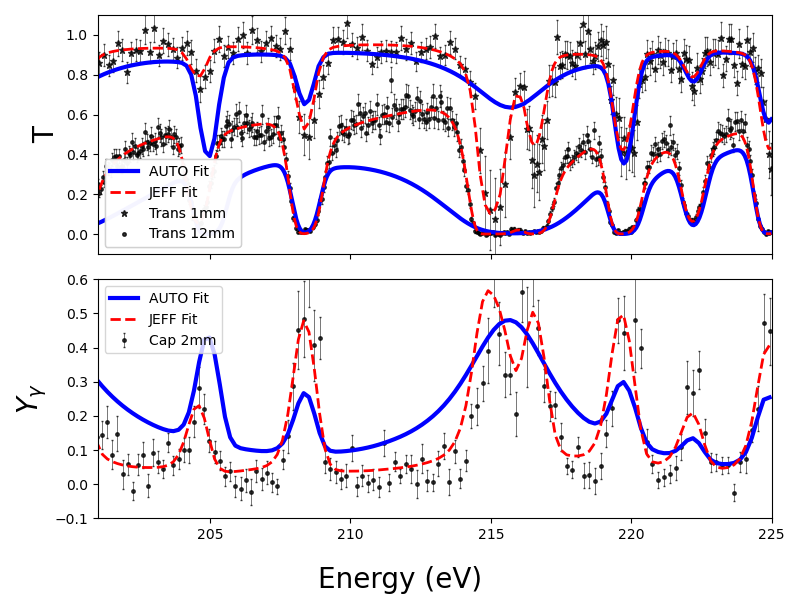

In [ ]:
# fig = plot(datasets, experiments, sammyOUT_fit3.pw_post, priors=sammyOUT.pw_post)

# colors = ["C1", "C2", "C3", "C4", "C5", "C6", "C7"]
# colors = ["blue", "darkblue","blue", "darkblue"]
colors = ["k", "k","k", "k"]

# colors2 = ["crimson","red", "crimson", "red"]
colors2 = ["red","red", "red", "red"]

fmts = ['.','.','*','.']

alphas = [1.0,1.0,1.0,1.0]
# alphas=[1.0]*4
fig, axes = subplots(2,1, figsize=(8,6), sharex=True)

for i, exp in enumerate(experiments):
    if exp.reaction == "transmission":
        model_key = "theo_trans"
        iax = 0
    elif exp.reaction == "capture":
        model_key = "theo_xs"
        iax = 1
    else:
        raise ValueError()
    
    if i == 0:
        pass
    else:

        axes[iax].errorbar(datasets[i].E, datasets[i].exp, yerr=datasets[i].exp_unc, zorder=0,
                                                fmt=fmts[i], color=colors[i], alpha=0.75, linewidth=0.5, markersize=5.0, capsize=0.5, label=exp.title)
        
        axes[iax].plot(sammyOUT_fit3.pw_post[i].E, sammyOUT_fit3.pw_post[i][model_key], color='b', lw=3.0, label=f'Auto {exp.title}', zorder=1,  alpha=alphas[i])

        axes[iax].plot(sammyOUT.pw_post[i].E, sammyOUT.pw_post[i][model_key], linestyle='dashed', color=colors2[i], lw=2.0, label=f'JEFF {exp.title}',zorder=2, alpha=alphas[i]) #, label=f'prior {exp.title}')

    
axes[0].set_ylabel("T", fontsize=20)
axes[1].set_ylabel(r"$Y_{\gamma}$", fontsize=20)

### make it pretty
for ax in axes:
    ax.set_xlim([201,225])
    ax.set_ylim([-0.1,1.1])
    # ax.legend(loc='upper left')
axes[1].set_ylim([-0.1, 0.6])

fig.supxlabel('Energy (eV)', fontsize=20)


# for i,r in sammyOUT_fit3.par_post.iterrows():
#     ax.axvline(r.E, ymin=0, ymax=1, linestyle='--', alpha=0.75, color='k')

# lines = axes[1].get_lines()
# legend1 = legend([lines[i] for i in [0,5]],["Cap 1mm", "Cap 2mm"], loc=0)
# legend1 = legend([lines[i] for i in [0,4]],["Cap 2mm"], loc=0)
axes[1].legend([r"AUTO Fit", r"JEFF Fit", "Cap 2mm"], loc="upper left")
# axes[1].add_artist(legend1)


lines = axes[0].get_lines()

# legend2 = axes[0].legend([lines[i] for i in [0,5]], ["Trans 1mm", "Trans 12mm"], loc="lower left")
legend2 = axes[0].legend([lines[i] for i in [3,4, 0,5]], [r"AUTO Fit", r"JEFF Fit","Trans 1mm", "Trans 12mm"], loc="lower left")

axes[0].add_artist(legend2)
# axes[0].legend([r"AUTO Fit", r"JEFF Fit", '','',"Trans 1mm", "Trans 12mm"], loc="lower right")

# for handle in legend1.legendHandles:
#     handle.set_sizes([100])


fig.tight_layout()

In [ ]:
len(lines)

10

In [ ]:
jeff_parameters

,E,Gg,Gn1,varyE,varyGg,varyGn1,J_ID
46,194.80,55.0000,99.5555,1.0,1.0,1.0,2.0
47,200.00,63.0000,31.4285,1.0,1.0,1.0,1.0
48,204.67,64.9999,2.7540,1.0,1.0,1.0,1.0
49,208.48,64.9999,9.4220,1.0,1.0,1.0,2.0
50,215.09,64.9999,48.2700,1.0,1.0,1.0,2.0
51,216.60,64.9999,19.3900,1.0,1.0,1.0,1.0
52,219.81,64.9999,12.8800,1.0,1.0,1.0,2.0
53,222.29,64.9999,2.4360,1.0,1.0,1.0,2.0
54,225.15,64.9999,20.5700,1.0,1.0,1.0,2.0


In [ ]:
# print(len(sammyOUT_fit2.par_post[sammyOUT_fit2.par_post.Gn1>1e-1]))
# par3 =copy(sammyOUT_fit2.par_post)
# par3 = par3[par3.Gn1>1e-1]
# par3["varyE"] = np.ones(len(par3))*0
# par3["varyGg"] = np.ones(len(par3))*1
# par3["varyGn1"] = np.ones(len(par3))*1

# ext_res = copy(par3.iloc[0:2,:])
# ext_res["E"] = [180, 270]
# ext_res["Gg"] = [1000, 1000]
# ext_res["varyGg"] = [1, 1]
# ext_res["varyGn1"] = [1, 1]

# par3 = pd.concat([ext_res.iloc[0:1,:], par3, ext_res.iloc[1:2,:]], ignore_index=True)
# par3

In [ ]:
# sammyINPyw.resonance_ladder = par3
# sammyOUT_fit3 = sammy_functions.run_sammy_YW(sammyINPyw, rto)

In [ ]:
# print(len(sammyOUT_fit3.par_post[sammyOUT_fit3.par_post.Gn1>1e-1]))
# print(len(jeff_parameters))

In [ ]:
# fig = plot(datasets, experiments, sammyOUT_fit3.pw_post, priors=sammyOUT_fit3.pw, true=sammyOUT.pw)
# fig.tight_layout()

### Next steps

Before giving this to oleksii for AIC, I could fit background with external resonances
1. fix the result above
2. add external resonances on either side of the window with fixed energies
3. Fit external resonance widths to capture background
4. give results to Oleksii where AIC will eliminate and re-fit all internal resonance parameters and only widths of external resonances
